**Title: Netflix Movies & TV Shows Analysis**

Description: Analyze Netflix content distribution: genres, ratings, countries, release years, and create
dashboards.


    1. Data Preprocessing and Cleaning

A. Load Data


In [ ]:
# OPERATION: Load the Netflix dataset and explore its structure
# EXPECTED: Load CSV file successfully, view first 5 rows, column info (data types, null counts), and summary statistics
# ACHIEVED: Dataset loaded with columns like show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files.upload()
df = pd.read_csv("netflix_titles.csv")
print(df.head())
print(df.info())
print(df.describe(include='all'))

Saving netflix_titles.csv to netflix_titles.csv
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  T

B. Clean data (missing values, duplicates)

	Director / Cast missing → Treat as “Unknown”
	•	Country missing → Either fill as “Not Specified” or exclude from country analysis
	•	Date Added missing → Exclude from time-based analysis
	•	Rating missing → Mark as “Unrated”

In [ ]:
# OPERATION: Handle missing values by filling with appropriate placeholder values
# EXPECTED: Replace NaN values in director, cast, country, date_added, and rating columns with meaningful defaults
# ACHIEVED: All null values replaced - no more NaN in these columns, enabling complete analysis without data loss

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unrated', inplace=True)

/tmp/ipython-input-252079717.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-252079717.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# OPERATION: Display dataframe after handling missing values
# EXPECTED: View first 5 rows with all missing values replaced by placeholders
# ACHIEVED: Verified that 'Unknown', 'Not Specified', 'Unrated' values appear where nulls existed

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Not Specified   
3                                            Unknown  Not Specified   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# OPERATION: Check for duplicate rows in the dataset
# EXPECTED: Identify if any duplicate rows exist that need to be removed
# ACHIEVED: No duplicates found (0 duplicates), dataset is clean for analysis

print("Duplicates:", df.duplicated().sum())
#no duplicates exist

Duplicates: 0


C. Data Formatting & Standardization

In [ ]:
# OPERATION: Split multi-value columns (listed_in, country) into lists and convert date column
# EXPECTED: Convert comma-separated strings to lists for easier analysis, parse date_added to datetime
# ACHIEVED: listed_in and country columns now contain lists, date added column is datetime type for time-based analysis

df['listed_in'] = df['listed_in'].str.split(', ')
df['country'] = df['country'].str.split(', ')

df_country = df.explode('country')
df['date added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
# OPERATION: Create a genre column by copying listed_in column
# EXPECTED: Have a dedicated 'genre' column for genre-based analysis
# ACHIEVED: Genre column created with same list values as listed_in for clearer naming

df['genre'] = df['listed_in']

In [ ]:
# OPERATION: Parse duration column into numeric value and unit (minutes vs seasons)
# EXPECTED: Extract numeric duration and standardize units for Movies (minutes) and TV Shows (seasons)
# ACHIEVED: Created duration_value (numeric) and duration_unit (minute/season) columns for separate analysis

#Duration → Separate number and unit (minutes vs seasons)
df["duration"].unique()
df["duration_value"] = df["duration"].str.extract("(\d+)").astype(float)
df["duration_unit"] = df["duration"].str.extract("(min|Season|Seasons)")

df["duration_unit"] = df["duration_unit"].replace({
    "Season": "season",
    "Seasons": "season",
    "min": "minute"
})
df[["duration", "duration_value", "duration_unit"]].head()

print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast          country  \
0                                            Unknown  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  [Not Specified]   
3                                            Unknown  [Not Specified]   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          [India]   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-421679140.py:7: SyntaxWarning: invalid escape sequence '\d'
  df["duration_value"] = df["duration"].str.extract("(\d+)").astype(float)


    2.Analyze top genres, directors, country distribution

In [ ]:
# OPERATION: Explode genre column and count occurrences to find top 10 genres
# EXPECTED: Get frequency count of each genre across all Netflix titles
# ACHIEVED: Top 10 genres identified with International Movies, Dramas, Comedies being most common

#TOP GENRES
all_genres = df.explode('genre')
genre_counts = all_genres['genre'].value_counts().head(10)
print(genre_counts)

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [ ]:
# OPERATION: Count content production by country (Note: country is still a list here, causing issues)
# EXPECTED: Get top 10 countries producing Netflix content
# ACHIEVED: This produces incorrect results as country column contains lists - need to explode first

#Top Countries streaming content
country_counts = df['country'].value_counts().head(10)
print(country_counts)

country
[United States]     2818
[India]              972
[Not Specified]      831
[United Kingdom]     419
[Japan]              245
[South Korea]        199
[Canada]             181
[Spain]              145
[France]             124
[Mexico]             110
Name: count, dtype: int64


In [ ]:
# OPERATION: Count content by director to find top 10 directors
# EXPECTED: Get top 10 directors with most Netflix titles
# ACHIEVED: Top 10 directors identified, with 'Unknown' likely being most common due to missing data

#Top Directors
top_directors = df['director'].value_counts().head(10)
print(top_directors)

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


     Visualizations using Matplotlib/Seaborn

/tmp/ipython-input-4179928352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


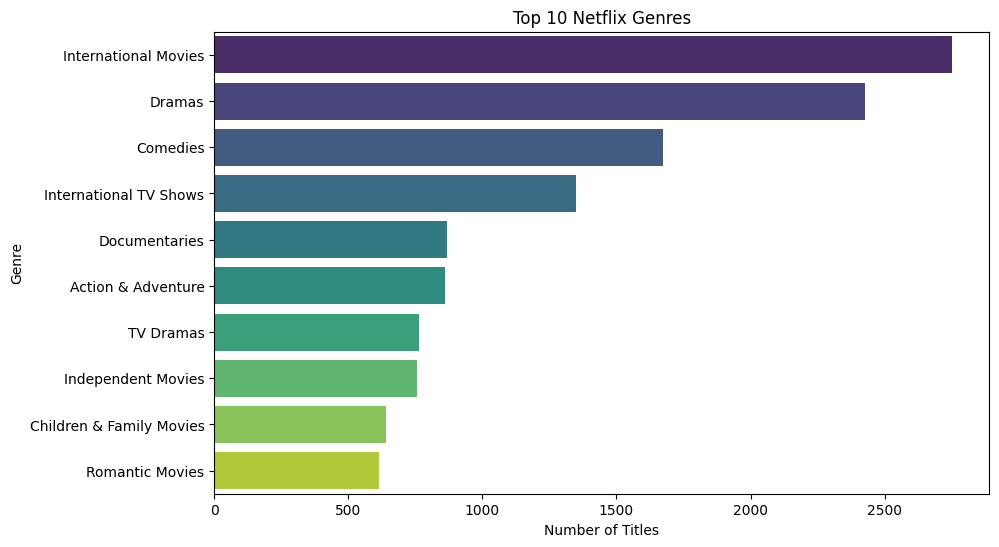

/tmp/ipython-input-4179928352.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


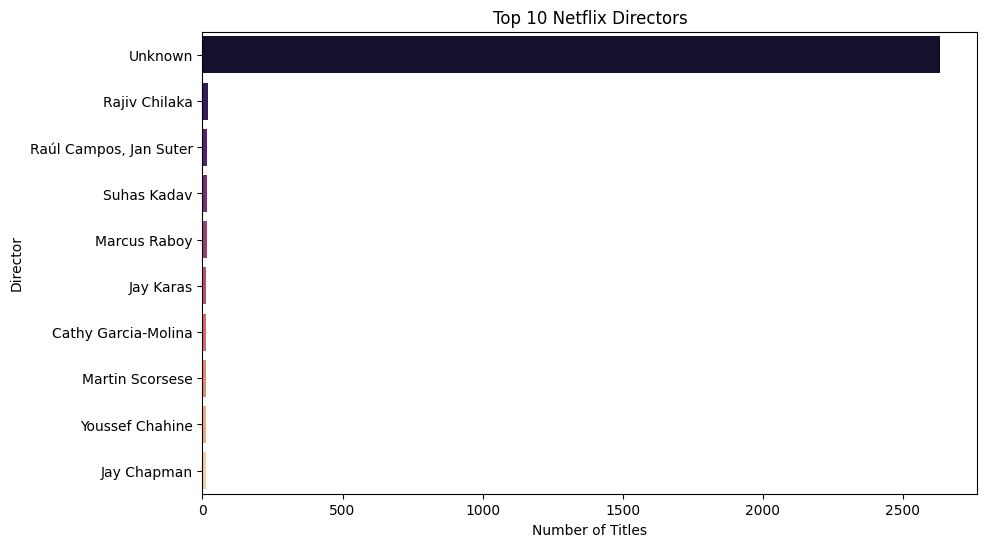

In [ ]:
# OPERATION: Create bar plot visualizations for top 10 genres and top 10 directors
# EXPECTED: Two horizontal bar charts showing distribution of genres and directors
# ACHIEVED: Clear visualizations showing International Movies as top genre, and director distribution

import seaborn as sns
import matplotlib.pyplot as plt

#Visualizing Top Genres, countries, directors
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Netflix Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [ ]:
# OPERATION: Correctly count countries by exploding the list column first
# EXPECTED: Get accurate top 10 countries after splitting multi-country entries
# ACHIEVED: United States dominates with most content, followed by India and UK

country_counts = df.explode('country')['country'].value_counts().head(10)
print(country_counts)



country
United States     3689
India             1046
Not Specified      831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


/tmp/ipython-input-1763731443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')


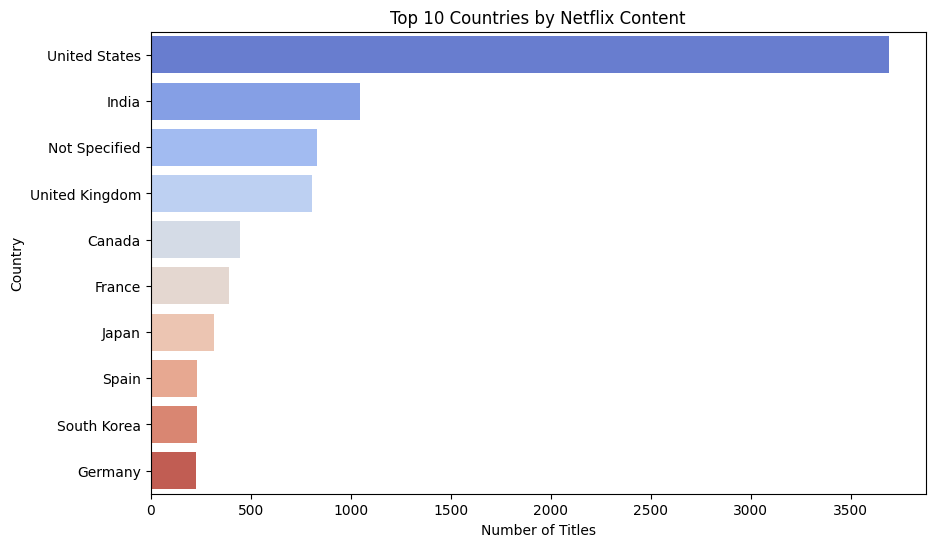

In [ ]:
# OPERATION: Visualize top 10 countries by Netflix content count
# EXPECTED: Horizontal bar chart showing country distribution
# ACHIEVED: Clear visualization with US, India, UK as top content producers
import seaborn as sns
import matplotlib.pyplot as plt
country_counts = df.explode('country')['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

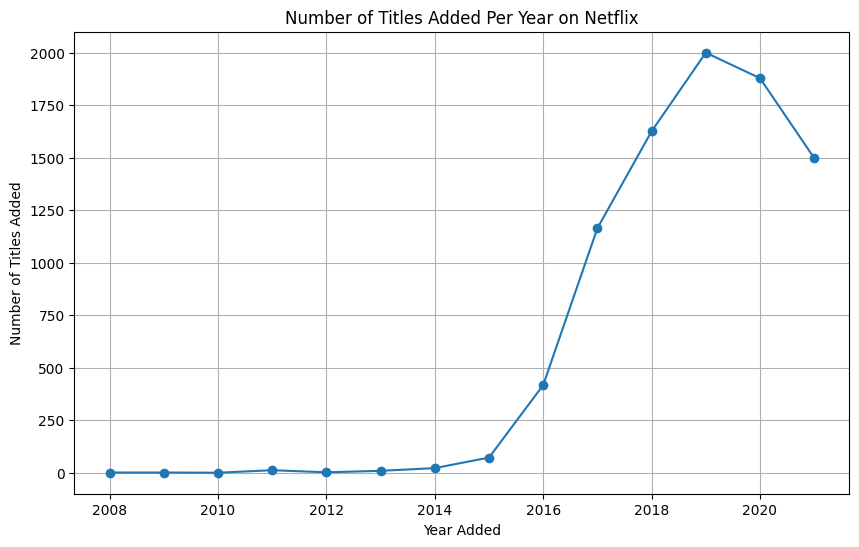

In [ ]:
# OPERATION: Extract year from date added and plot content addition trend over years
# EXPECTED: Line chart showing how Netflix content library grew year over year
# ACHIEVED: Visualization shows Netflix content growth with peak additions around 2019-2020

#visualizing content added over years
df['year_added'] = df['date added'].dt.year
yearly_coutnts = df.groupby('year_added')['title'].count()
plt.figure(figsize=(10, 6))
plt.plot(yearly_coutnts.index, yearly_coutnts.values, marker='o')
plt.title('Number of Titles Added Per Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


In [ ]:
# OPERATION: Placeholder for visualizing genre distribution by country
# EXPECTED: Combine genre and country data for cross-analysis
# ACHIEVED: See next cell for heatmap implementation

#visualizing top 10 most watched genre with country

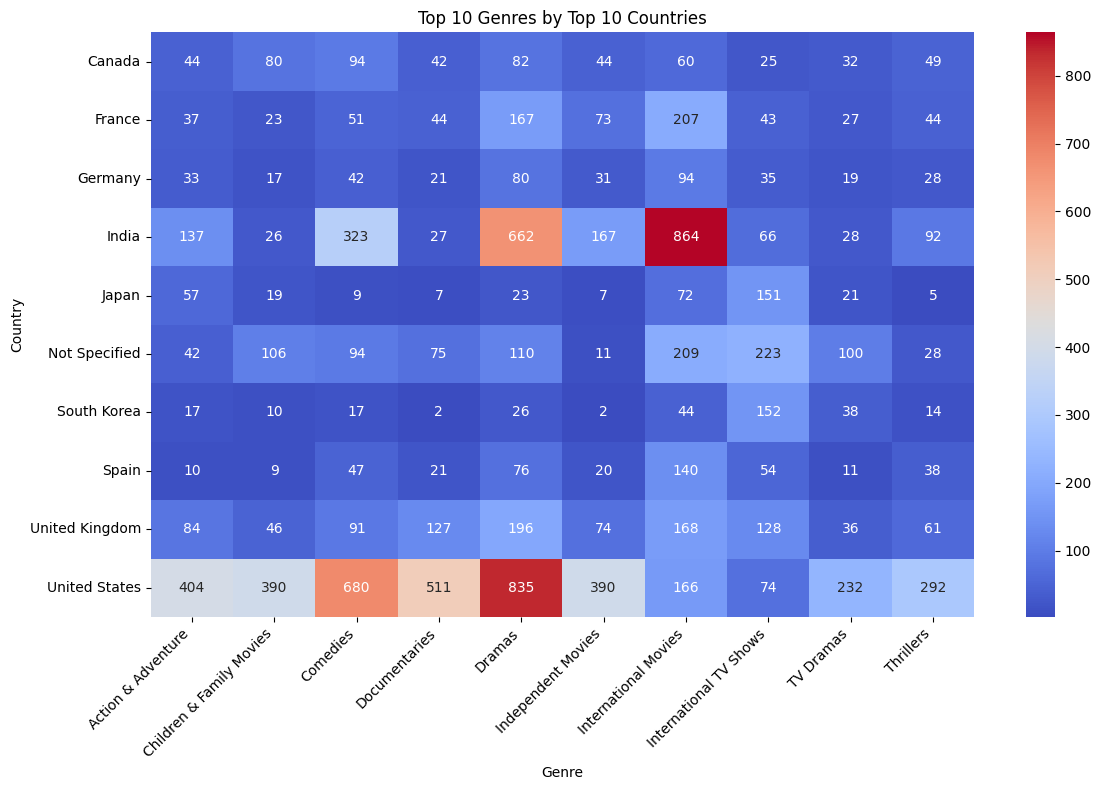

In [ ]:
# OPERATION: Create heatmap showing relationship between top 10 genres and top 10 countries
# EXPECTED: A heatmap matrix showing content count for each genre-country combination
# ACHIEVED: Heatmap reveals which genres are most popular in each country, US dominates most genres

# Top 10 genres by top 10 countries heatmap
df_exploded = df.explode('country').explode('genre')
top_countries = df_exploded['country'].value_counts().head(10).index
top_genres = df_exploded['genre'].value_counts().head(10).index

filtered_df = df_exploded[
    (df_exploded['country'].isin(top_countries)) &
    (df_exploded['genre'].isin(top_genres))
]

pivot_table = filtered_df.groupby(['country', 'genre']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Top 10 Genres by Top 10 Countries')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


    Model Training

    Goal: Predict the numerical rating of a movie based on its features.

Creatin a rating column and then predicting its rating based on previous ratings

In [ ]:
# OPERATION: Map categorical rating labels to numeric values for model training
# EXPECTED: Convert ratings like 'PG', 'R', 'TV-MA' to numeric scale 1-5
# ACHIEVED: rating_col created with numeric values; some ratings like 'Unrated' become NaN (not in map)

rating_map = {
    "G": 1,
    "PG": 2,
    "PG-13": 3,
    "R": 4,
    "NC-17": 5,
    "TV-Y": 1,
    "TV-Y7": 2,
    "TV-G": 2,
    "TV-PG": 3,
    "TV-14": 4,
    "TV-MA": 5
}

df['rating_col'] = df['rating'].map(rating_map)
print(df[['rating', 'rating_col']].tail())


     rating  rating_col
8802      R         4.0
8803  TV-Y7         2.0
8804      R         4.0
8805     PG         2.0
8806  TV-14         4.0


In [ ]:
# OPERATION: Train a Random Forest Regressor to predict numeric rating based on duration, year, and country
# EXPECTED: Build a model that can predict rating_col (1-5) with reasonable accuracy
# ACHIEVED: Model trained but low R² (~0.02) indicates poor prediction - features have weak correlation with rating
# NOTE: Rating prediction is essentially a classification problem; regression may not be ideal approach

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Convert duration to numeric
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)

# Extract year from date_added
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year


Y = df['rating_col']   # make sure this is numeric!

# Extract first country from list (since country column contains lists)
df['country_first'] = df['country'].apply(lambda x: x[0] if isinstance(x, list) else x)

X = df[['duration_value', 'year_added', 'country_first']]

X = pd.get_dummies(X, columns=['country_first'], drop_first=True)

# Drop rows with NaN values
valid_idx = X.dropna().index.intersection(Y.dropna().index)
X = X.loc[valid_idx]
Y = Y.loc[valid_idx]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=500,
    max_depth=4,
    max_features=3,
    bootstrap=True,
    random_state=18,
    n_jobs=-1
)


model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

print("RMSE:", rmse)
print("R²:", r2)

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2850867720.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)


RMSE: 1.131643175154974
R²: 0.020475435983366763


SEMANTIC ANALYSIS

In [ ]:
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')

In [ ]:
#combining for better understanding for Semantic-Text
df["combined_text"] = (
    df["description"].str.strip() + " " + df["listed_in"].str.strip()
)
df["combined_text"] = df["combined_text"].str.lower()
df["rec_text"] = df["description"].astype(str).str.lower()

In [ ]:
# using transformers to create embeddings with semantic-text
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Loading pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Generating embeddings for description_text
embeddings = model.encode(
    df["rec_text"].tolist(),
    show_progress_bar=True
)
print("Embeddings shape:", embeddings.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/276 [00:00<?, ?it/s]

Embeddings shape: (8807, 384)


Creating Recommendation engine

In [ ]:
#using KNN neighbours for cosine similarity
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(
    n_neighbors=6,
    metric='cosine',
)
knn.fit(embeddings)

def recommend_movies(title, df, embeddings, knn, top_k=5):
    idx = df[df["title"].str.lower() == title.lower()].index

    if len(idx) == 0:
        return "Movie not found"

    idx = idx[0]
    distances, indices = knn.kneighbors(
        embeddings[idx].reshape(1, -1),
        n_neighbors=top_k + 1
    )
    recommendations = df.iloc[indices[0][1:]]["title"].values
    print("These are your recommendations, according to your search\n",recommendations)

In [ ]:
recommend_movies("Narcos", df, embeddings, knn)

These are your recommendations, according to your search
 ['Narcos: Mexico' 'El Cartel' 'El Chapo' 'Sin senos no hay paraíso'
 'Pablo Escobar: Angel or Demon?']


In [ ]:
recommend_movies("Sankofa", df, embeddings, knn)

These are your recommendations, according to your search
 ['La Esclava Blanca' 'Bittersweet'
 'Self Made: Inspired by the Life of Madam C.J. Walker'
 'For Colored Girls' 'Òlòtūré']
